# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rafifa Addin Sahirah
- **Email:** rafifasahirah6@student.ub.ac.id
- **ID Dicoding:** rafifasahirah6

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan rata-rata casual dengan registered user pada holiday dan non holiday?
- Berapakah rata-rata penyewaan sepeda per bulan pada tahun 2012, serta pada bulan berapakah yang memiliki rata-rata penyewaan tertinggi pada tahun tersebut?
- Bagaimana pengaruh musim terhadap rata-rata penyewaan sepeda per jam?

## Import Semua Packages/Library yang Digunakan

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [18]:
current_dir = os.getcwd()
hour_csv_path = os.path.join(current_dir, 'data', 'hour.csv')
df = pd.read_csv(hour_csv_path)

Kode diatas bertujuan untuk membaca file csv yang disimpan di dalam folder data. Dengan menggunakan os.getcwd(), mengembalikan direktori kerja saat ini yang bermaksud menjadikannya absolut path. Kemudian file csv yang telah terbaca disimpan di dalam dataframe bernama df

In [19]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Kode diatas bertujuan untuk menampilkan beberapa baris pertama dari dataframe df

### Assessing Data

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dengan menggunakan info() membantu saya untuk melihat tipe data setiap kolomnya

In [21]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Kode diatas bertujuan untuk melihat apakah ada baris kosong (null) pada setiap kolom

In [22]:
print("Jumlah duplikasi pada dataframe jam (df_hour): ",df.duplicated().sum())

Jumlah duplikasi pada dataframe jam (df_hour):  0


In [23]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Kode diatas bertujuan untuk melihat ringkasan yang berisi nilai count, mean, std, min, 25%, 50%, 75%, dan max

**Penilaian Data**

Dapat disimpulkan bahwa:
1. Terdapat tipe data object pada kolom dteday pada  dataframe yang seharusnya bertipe data date time 
2. Tidak terdapat missing value pada dataframe
3. Tidak terdapat duplicate value pada dataframe
4. Tidak terdapat inaccurate value pada dataframe


### Cleaning Data

Memperbaiki kesalahan tipe data untuk kolom dteday yakni dengan cara menggantinya menjadi tipe data datetime

In [24]:
df['dteday'] = pd.to_datetime(df['dteday'])

## Exploratory Data Analysis (EDA)

### Explore ...

In [44]:
df_holiday = df.groupby(by="holiday").agg({
    "casual": "mean",
    "registered": "mean"
})

df_holiday["registered"]

holiday
0    155.020203
1    112.152000
Name: registered, dtype: float64

Kode diatas bertujuan untuk menghitung rata-rata casual dan registered user berdasarkan holiday

In [26]:
df_2012 = df[df['yr'] == 1]
average_rentals_per_month_2012 = df_2012.groupby(by="mnth").cnt.mean()

average_rentals_per_month_2012.head(13)

mnth
1     130.558704
2     149.041908
3     221.904441
4     242.651811
5     263.259409
6     281.708333
7     273.665323
8     288.310484
9     303.573611
10    280.848870
11    212.623955
12    166.729111
Name: cnt, dtype: float64

Kode diatas untuk menghitung rata-rata penyewaan sepeda per bulannya

In [27]:
max_rental_month = average_rentals_per_month_2012.max()
index_max =  average_rentals_per_month_2012.idxmax()
print("Rata-rata penyewaan tertinggi pada bulan ke-", index_max, "sebesar", max_rental_month)

Rata-rata penyewaan tertinggi pada bulan ke- 9 sebesar 303.5736111111111


In [28]:
average_hourly_rental_by_season = df.groupby(by="season").cnt.mean().sort_values(ascending=False)
average_hourly_rental_by_season.head()

season
3    236.016237
2    208.344069
4    198.868856
1    111.114569
Name: cnt, dtype: float64

Kode diatas bertujuan untuk menghitung rata-rata penyewaan sepeda berdasarkan musim.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

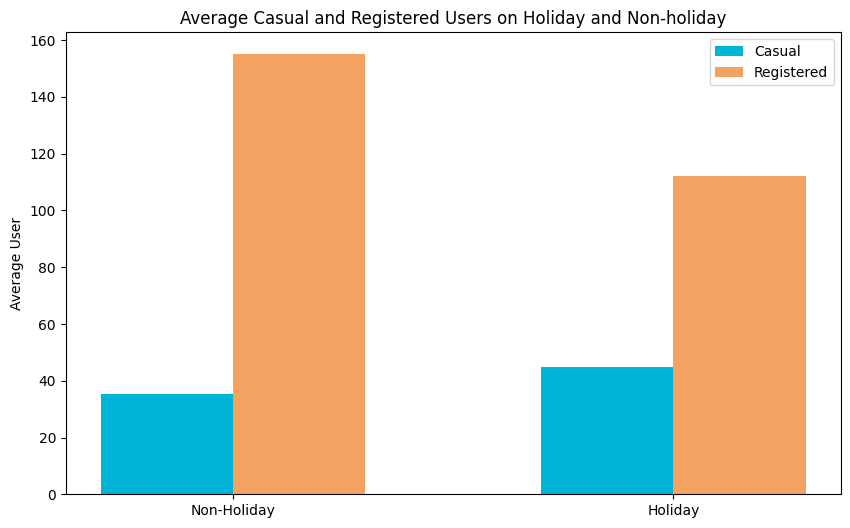

In [42]:
plt.figure(figsize=(10, 6))

casual_means = df_holiday['casual']
registered_means = df_holiday['registered']

labels = ['Non-Holiday', 'Holiday']
x = range(len(labels))

plt.bar(x, casual_means, width=0.6, color="#00b4d8" ,label='Casual', align='center')
plt.bar(x, registered_means, width=0.3, color="#f4a261", label='Registered', align='edge')
plt.xticks(x, labels)
plt.ylabel('Average Users')
plt.title('Average Casual and Registered Users on Holiday and Non-holiday')
plt.legend()

plt.show()

Pada kode di atas visualisasi menggunakan bar chart. Terlihat bahwa terdapat dua bar pada masing-masing label sumbu x yang dimana bar warna biru merepresentasikan casual users dan bar warna orange merepresentasikan registered users

### Pertanyaan 2:

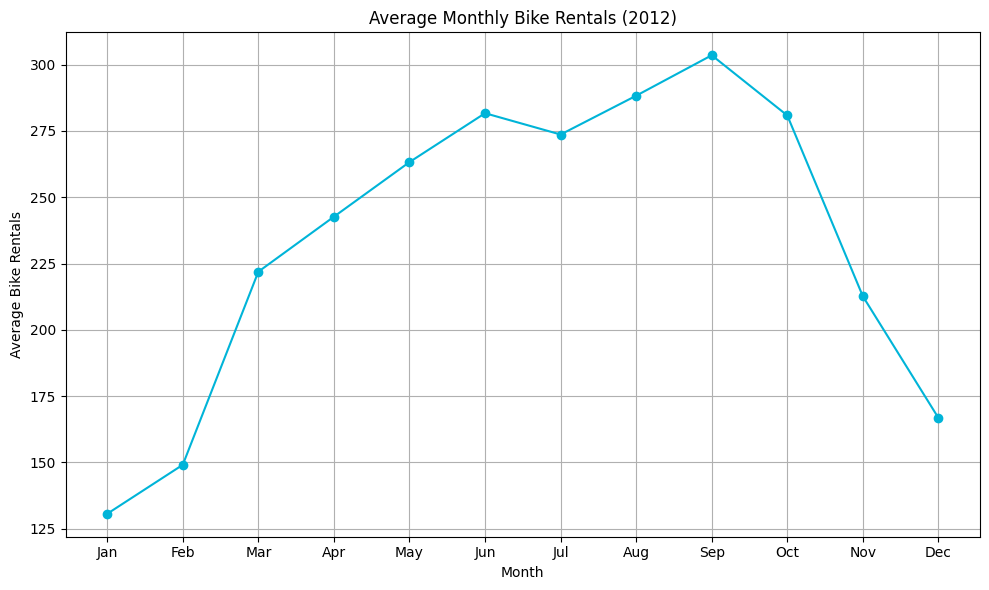

In [39]:
months = np.arange(1, 13)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 6))
plt.plot(average_rentals_per_month_2012.index, average_rentals_per_month_2012.values, marker='o', linestyle='-', color="#00b4d8")
plt.title('Average Monthly Bike Rentals (2012)')
plt.xlabel('Month')
plt.ylabel('Average Bike Rentals')
plt.xticks(average_rentals_per_month_2012.index, month_names) 
plt.grid(True)
plt.tight_layout()

plt.show()

Pada di kode atas visualisasi menggunakan line chart yang dimana untuk nilai pada month yang awalnya 1-12 diubah menjadi nama bulannya.

### Pertanyaan 3:

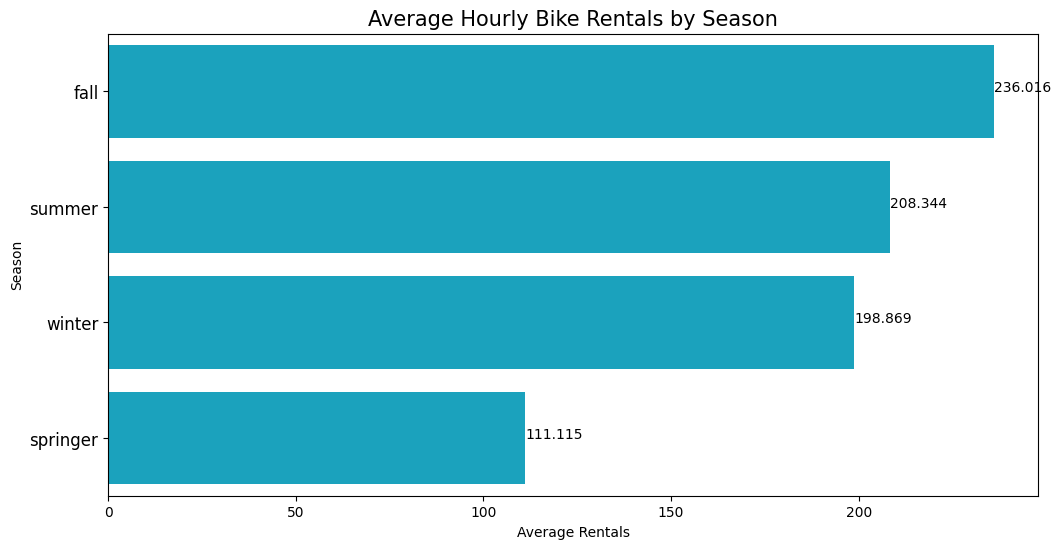

In [43]:
season_mapping = {1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'}
season_labels = average_hourly_rental_by_season.index.map(season_mapping)

plt.figure(figsize=(12, 6))

colors = ["#00b4d8", "#00b4d8", "#00b4d8", "#00b4d8"]

num = sns.barplot(x=average_hourly_rental_by_season.values, y=season_labels, hue=season_labels, palette=colors, legend=False)

for index, value in enumerate(average_hourly_rental_by_season.values):
    num.text(value, index, f'{value:.3f}', color='black', ha="left")
    
plt.ylabel("Season")
plt.xlabel("Average Rentals")
plt.title("Average Hourly Bike Rentals by Season", loc="center", fontsize=15)
plt.tick_params(axis='y', labelsize=12)

plt.show()

Pada kode diatas visualisasi menggunakan bar chart vertikal. Saya mengubah nilai pada kolom season yang awalnya 1-4 menjadi springer, summer, fall dan winter.

## Conclusion

**Pertanyaan 1:**
- Berdasarkan proses analisis yang telah dilakukan, pada holiday maupun non holiday rata-rata registered users lebih tinggi dibandingkan dengan casual users. Pada holiday, rata-rata registered sebesar 112.15200 sedangkan casual sebesar 44.71800. Pada non-holiday registered sebesar 155.02020 sedangkan casual sebesar 35.40838

**Pertanyaan 2:**
- Berdasarkan proses analisis yang telah dilakukan, rata-rata pada bulan januari sebesar 130.558704, februari sebesar 149.041908, maret sebesar 221.904441, april sebesar 242.651811, mei sebesar 263.259409, juni sebesar 281.708333, juli sebesar 273.665323, agustus sebesar 288.310484, september sebesar 303.573611, oktober sebesar 280.848870, november sebesar 212.623955, desember sebesar 166.729111. Rata-rata penyewaan sepeda tertinggi terjadi pada bulan ke-9 yakni bulan september sebesar 303.57361.

**Pertanyaan 3:**
- Berdasarkan proses analisis yang telah dilakukan, musim mempengaruhi rata-rata penyewaan sepeda per jamnya. Hal ini tergambar dari bar chart yang menunjukkan perbedaan rata-rata penyewaan sepeda per jam pada setiap musim. Pada musim gugur (fall) rata-rata penyewaan sepeda cenderung lebih tinggi dibanding musim yang lainnya. Dan pada musim springer cenderung lebih rendah dibanding musim lainnya.